In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import matplotlib

from glob import glob

In [2]:
def get_data(path_to_images, path_to_masks):
    images_names = glob(f'{path_to_images}/*.bmp')
    masks_names = glob(f'{path_to_masks}/*.bmp')    
    
    images = [cv2.imread(name) for name in images_names]
    images = [cv2.resize(img, (1024, 1024)) for img in images]
    masks = [cv2.imread(name) for name in masks_names]
    masks = [cv2.resize(msk, (1024, 1024), interpolation=cv2.INTER_NEAREST) for msk in masks]

    return images, masks

In [3]:
def get_masks(path_to_masks):
    masks_names = glob(f'{path_to_masks}/*.bmp')    
    
    masks = [cv2.imread(name) for name in masks_names]
    masks = [cv2.resize(msk, (1024, 1024), interpolation=cv2.INTER_NEAREST) for msk in masks]

    return masks

In [4]:
def masks_per_classes(masks):
    mpc = [0] * 9
    for mask in masks:
        uniq = np.unique(mask)
        for u in uniq:
            mpc[u] += 1
    return mpc

In [11]:
!ls /raid

HIS		kutikova    nikonorov  rustam	  shutanov
docker_volumes	lost+found  protsenko  shustanov


In [12]:
images, masks = get_data('/raid/rustam/med_data/all_data/images', '/raid/rustam/med_data/all_data/masks')
len(images), len(masks)

(115, 115)

### How many masks contains which classes

In [26]:
import matplotlib 
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)

In [17]:
percents_0 = np.round(np.array(masks_per_classes(masks)) / len(masks), 3)[1:]
for i, percent in enumerate(percents_0):
    print(f"Class {i} contained in {percent*100:.2f}% images {'!ATTENTON!' if percent < 0.2 else ''}")

Class 0 contained in 100.00% images 
Class 1 contained in 97.40% images 
Class 2 contained in 100.00% images 
Class 3 contained in 90.40% images 
Class 4 contained in 37.40% images 
Class 5 contained in 7.00% images !ATTENTON!
Class 6 contained in 10.40% images !ATTENTON!
Class 7 contained in 95.70% images 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


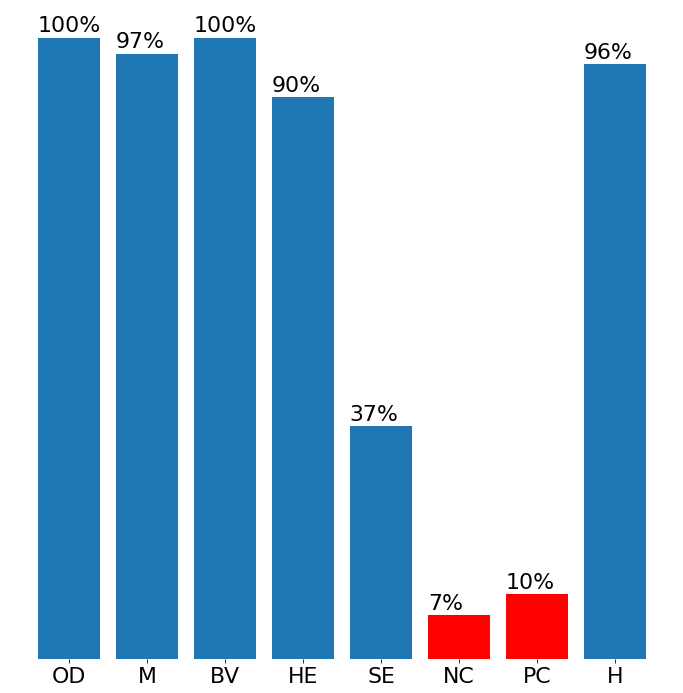

In [31]:
uniq_higher = percents_0 > 0.20
uniq_lower = percents_0 <= 0.20
labels = np.arange(8)
xticks = ['OD', 'M', 'BV', 'HE', 'SE', 'NC', 'PC', 'H']

fig = plt.figure(figsize=(12, 12))
# plt.title('Процент изображений содержащих тот или иной класс')

plt.bar(labels[uniq_higher], percents_0[uniq_higher])
plt.bar(labels[uniq_lower], percents_0[uniq_lower], color='red')

plt.xticks(labels, xticks)
# plt.xticklabels(xticks)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

ax = plt.axes()
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))

fig.savefig('ClassesPrecision.svg')

In [21]:
uniq, count = np.unique(masks, return_counts=True)

In [22]:
count

array([303429888,  10164360,   3856299,  36620082,   3012675,    795528,
          106611,    174675,   3598602])

In [28]:
count_wo_0[2] *= 3

/home/rustam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


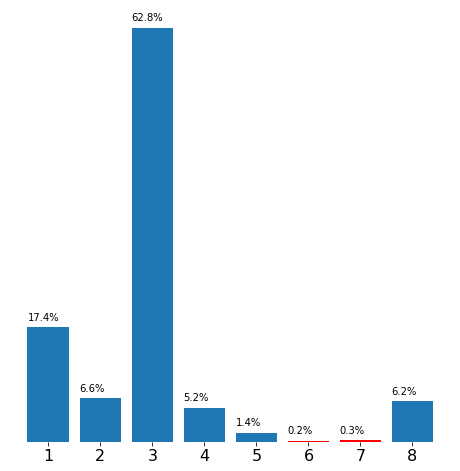

In [30]:
uniq_wo_0 = uniq[1:]
count_wo_0 = count[1:]
uniq_higher = count_wo_0 > 700000
uniq_lower = count_wo_0 <= 700000

plt.figure(figsize=(8, 8))
# plt.title('Percent of pixels of each class', fontsize=16)
plt.yticks([])
plt.xticks(labels[1:], fontsize=16)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
plt.bar(uniq_wo_0[uniq_higher], count_wo_0[uniq_higher] / count_wo_0.sum())
plt.bar(uniq_wo_0[uniq_lower], count_wo_0[uniq_lower] / count_wo_0.sum(), color='red')

ax = plt.axes()
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.1%}'.format(height), (x, y + height + 0.01))
    
plt.show()

# Balanced data

In [41]:
masks = get_masks('/raid/rustam/med_data/upsampling_batches/paper_batch_1/train_set/aug_set/set_1024_20elastic/masks')

In [42]:
len(masks)

3096

In [43]:
percents = np.round(np.array(masks_per_classes(masks)) / len(masks), 3)
for i, percent in enumerate(percents):
    print(f"Class {i} contained in {percent*100:.2f}% images {'!ATTENTON!' if percent < 0.2 else ''}")

Class 0 contained in 100.00% images 
Class 1 contained in 99.70% images 
Class 2 contained in 98.60% images 
Class 3 contained in 100.00% images 
Class 4 contained in 95.10% images 
Class 5 contained in 42.90% images 
Class 6 contained in 41.20% images 
Class 7 contained in 31.40% images 
Class 8 contained in 99.70% images 


In [42]:
font = {'size'   : 14}

matplotlib.rc('font', **font)

In [47]:
class_values = np.array([115, 112, 114, 96, 39, 6, 27, 95])
class_names = np.array(['I', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'VIII'])

In [49]:
len(class_values), len(class_names)

(8, 8)

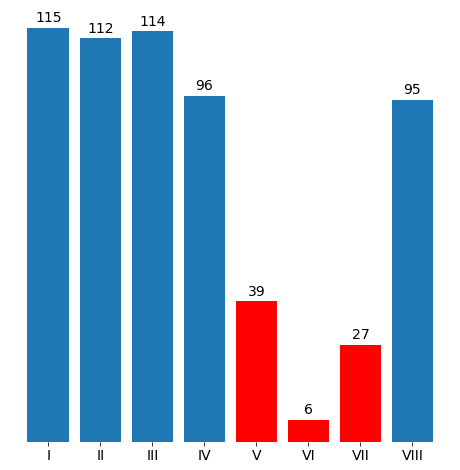

In [59]:
def label(rects):
    for rect in rects:
        h = rect.get_height()
        ax.annotate('{}'.format(h),
                        xy=(rect.get_x() + rect.get_width() / 2, h),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

uniq_higher = class_values > 40
uniq_lower = class_values <= 40

fig, ax = plt.subplots(figsize=(8, 8))
rects1 = ax.bar(class_names[uniq_higher][:4], class_values[uniq_higher][:4])
rects2 = ax.bar(class_names[uniq_lower], class_values[uniq_lower], color='red')
rects3 = ax.bar(class_names[uniq_higher][4:], class_values[uniq_higher][4:], color='#1f77b4')

plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

label(rects1)
label(rects2)
label(rects3)

plt.show()
fig.savefig('image.svg')

In [44]:
masks = get_masks('/raid/rustam/med_data/upsampling_batches/paper_batch_1/train_set/aug_set/set_1024_20elastic/masks')

In [88]:
percents_1 = np.round(np.array(masks_per_classes(masks)) / len(masks), 3)
for i, percent in enumerate(percents_1):
    print(f"Class {i} contained in {percent*100:.2f}% images {'!ATTENTON!' if percent < 0.2 else ''}")

Class 0 contained in 100.00% images 
Class 1 contained in 99.50% images 
Class 2 contained in 98.00% images 
Class 3 contained in 100.00% images 
Class 4 contained in 14.70% images !ATTENTON!
Class 5 contained in 93.00% images 
Class 6 contained in 36.50% images 
Class 7 contained in 16.20% images !ATTENTON!
Class 8 contained in 19.90% images !ATTENTON!
Class 9 contained in 96.90% images 


In [89]:
masks = get_masks('/mnt/data/med_data/balanced_batches/paper_batch_1/train_set/aug_set/set_1024_wo_4_2/masks')

In [90]:
percents_2 = np.round(np.array(masks_per_classes(masks)) / len(masks), 3)
for i, percent in enumerate(percents_2):
    print(f"Class {i} contained in {percent*100:.2f}% images {'!ATTENTON!' if percent < 0.2 else ''}")

Class 0 contained in 100.00% images 
Class 1 contained in 99.50% images 
Class 2 contained in 98.00% images 
Class 3 contained in 100.00% images 
Class 4 contained in 14.70% images !ATTENTON!
Class 5 contained in 93.00% images 
Class 6 contained in 36.50% images 
Class 7 contained in 16.20% images !ATTENTON!
Class 8 contained in 19.90% images !ATTENTON!
Class 9 contained in 96.90% images 


In [93]:
colors_list = ['#5cb85c','#5bc0de','#d9534f']

In [95]:
total_percents = [[p1, p2, p3] for p1, p2, p3 in zip(percents_0, percents_1, percents_2)]

/home/rustam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


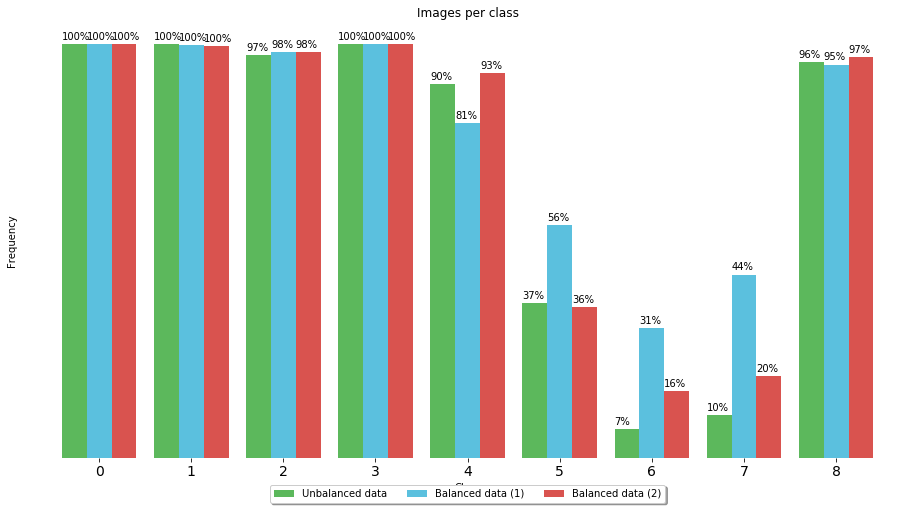

In [122]:
labels = np.arange(9)

plt.figure(figsize=(16, 8))
bar_width = 0.27

plt.bar(labels, percents_0, width=bar_width, color=colors_list[0], label='Unbalanced data')
plt.bar(labels + bar_width, percents_1, width=bar_width, color=colors_list[1], label='Balanced data (1)')
plt.bar(labels + 2 * bar_width, percents_2, width=bar_width, color=colors_list[2], label='Balanced data (2)')

plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Images per class')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=3)

plt.xticks(labels + bar_width, labels, fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

ax = plt.axes()
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))

plt.show()

In [123]:
np.ones(10) * np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [124]:
np.dot(np.ones(10), np.zeros(10))

0.0

# Compare Results of Experiments

In [1]:
import pandas as pd

In [24]:
df

,Unnamed: 0,epoch,v_dice_list,bkg,10,20,30,50,60,70,80,90
0,0,0,0.451434,0.957718,0.884067,0.619785,0.710069,0.481853,0.250731,1.103846e-13,0.058885,0.551228
1,1,1,0.450642,0.958872,0.890303,0.672071,0.727388,0.461880,0.060562,7.471886e-02,0.015271,0.645351
2,2,2,0.478217,0.959516,0.886360,0.595048,0.737979,0.457300,0.288222,1.245174e-01,0.074213,0.659009
3,3,3,0.506143,0.960880,0.916063,0.703733,0.734936,0.583965,0.267743,1.157261e-01,0.171476,0.606905
4,4,4,0.496318,0.959902,0.917957,0.639423,0.751038,0.587956,0.229689,9.535794e-02,0.129317,0.652544
5,5,5,0.504671,0.960188,0.915645,0.705130,0.751493,0.574719,0.292041,1.078004e-01,0.131861,0.607829
6,6,6,0.458837,0.957698,0.916684,0.675969,0.745909,0.373051,0.197255,7.821242e-02,0.091020,0.552575
7,7,7,0.482726,0.959713,0.905783,0.518525,0.739143,0.595055,0.261814,7.844718e-02,0.149215,0.619570
8,8,8,0.501335,0.960214,0.900338,0.695172,0.738021,0.600397,0.249332,1.149420e-01,0.138376,0.616553
9,9,9,0.509859,0.959841,0.910121,0.705229,0.742941,0.584494,0.341389,1.257137e-01,0.155471,0.573391


In [45]:
test_dirs_list = [
#     'Test#1_x-65_CrossValidation3Batches_WithoutBalance',
#     'Test#2_x-65_CrossValidation3Batches(Danil)_BalancedData',
#     'Test#3_x-65_CrossValidation3Batches(Artem)_BalancedData',
#     'Test#4_x-65_wo_4_CV3Batches_Unbalanced',
#     'Test#5_x-65_wo_4_CV3Batches_Danil',
#     'Test#6_x-65_wo_4_CV3Batches_Artem',
    'Test#7_x-65_oversampling'
]

In [46]:
batches_tables_list = []
for batch_num in range(1, 4):
    tables_list = []
    for test_dir in test_dirs_list:
        df = pd.read_csv(f'{test_dir}/exp_cv{batch_num}/x-65/MakiSegmentator_gamma=2_opt_name=adam1_bsz=8/test_info.csv')
#         tables_list.append(df[['epoch', '70', '80']].values)
        tables_list.append(df.values)
    batches_tables_list.append(tables_list)

In [47]:
class_num = 6

In [48]:
np.array(batches_tables_list).shape

(3, 1, 10, 12)

In [49]:
np.max(np.array(batches_tables_list)[0, :, :, :], axis=1)

array([[9.00000000e+00, 9.00000000e+00, 3.05988520e-01, 9.49078118e-01,
        7.66734055e-01, 4.66524108e-01, 6.67827589e-01, 2.66850161e-01,
        2.14953574e-01, 1.12051951e-12, 6.88951009e-13, 5.10644162e-01]])

In [53]:
np.round(np.mean(np.max(np.array(batches_tables_list)[0, :, :, :], axis=1), axis=0), 4)

array([9.    , 9.    , 0.306 , 0.9491, 0.7667, 0.4665, 0.6678, 0.2669,
       0.215 , 0.    , 0.    , 0.5106])

In [22]:
np.mean(np.array(batches_tables_list)[0, :, :, class_num], axis=1)

array([0.72734209])

In [23]:
np.mean(np.array(batches_tables_list)[0, :, :, class_num], axis=0)

array([0.70989549, 0.73071766, 0.71592564, 0.73882581, 0.74054109,
       0.7275719 , 0.72882481, 0.73123791, 0.72273078, 0.72714986])

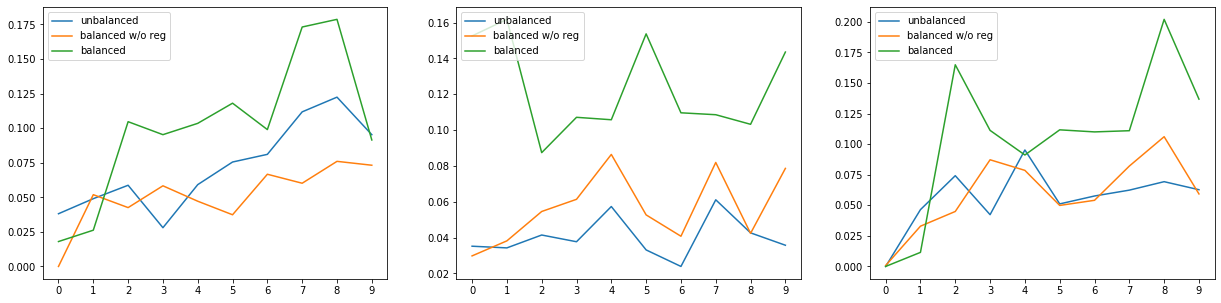

In [62]:
class_num = 2
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(21, 5))

ax1.plot(np.arange(10), np.array(batches_tables_list)[0, 0, :, class_num], label='unbalanced')
ax1.plot(np.arange(10), np.array(batches_tables_list)[1, 0, :, class_num], label='balanced w/o reg')
ax1.plot(np.arange(10), np.array(batches_tables_list)[2, 0, :, class_num], label='balanced')
ax1.xaxis.set_ticks(np.arange(10))
ax1.legend(loc='upper left')

ax2.plot(np.arange(10), np.array(batches_tables_list)[0, 1, :, class_num], label='unbalanced')
ax2.plot(np.arange(10), np.array(batches_tables_list)[1, 1, :, class_num], label='balanced w/o reg')
ax2.plot(np.arange(10), np.array(batches_tables_list)[2, 1, :, class_num], label='balanced')
ax2.xaxis.set_ticks(np.arange(10))
ax2.legend(loc='upper left')

ax3.plot(np.arange(10), np.array(batches_tables_list)[0, 2, :, class_num], label='unbalanced')
ax3.plot(np.arange(10), np.array(batches_tables_list)[1, 2, :, class_num], label='balanced w/o reg')
ax3.plot(np.arange(10), np.array(batches_tables_list)[2, 2, :, class_num], label='balanced')
ax3.xaxis.set_ticks(np.arange(10))
ax3.legend(loc='upper left')

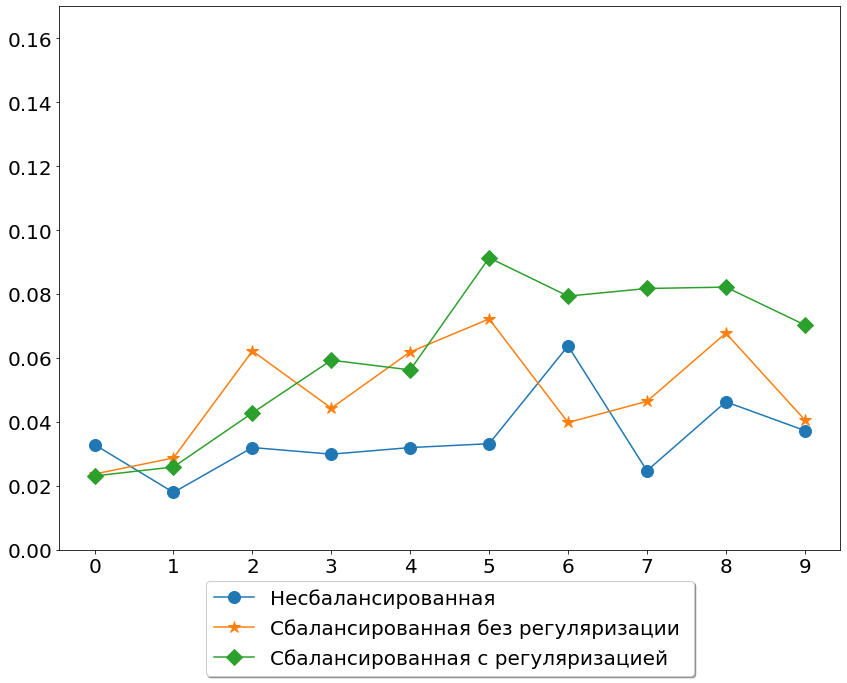

In [119]:
class_num = 1
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 10))

ax.set_ylim([0, 0.17])
ax.plot(np.arange(10), np.mean(np.array(batches_tables_list)[0, :, :, class_num], axis=0), 'o-', label='Несбалансированная', markersize=12)
ax.plot(np.arange(10), np.mean(np.array(batches_tables_list)[1, :, :, class_num], axis=0), '*-', label='Сбалансированная без регуляризации ', markersize=12)
ax.plot(np.arange(10), np.mean(np.array(batches_tables_list)[2, :, :, class_num], axis=0), 'D-', label='Сбалансированная с регуляризацией', markersize=12)
ax.xaxis.set_ticks(np.arange(10))
for tick in ax.xaxis.get_majorticklabels():  # example for xaxis
    tick.set_fontsize(20) 
for tick in ax.yaxis.get_majorticklabels():  # example for xaxis
    tick.set_fontsize(20)
ax.legend(loc='lower center', fontsize=20, bbox_to_anchor=(0.5, -0.25), fancybox=True, shadow=True)

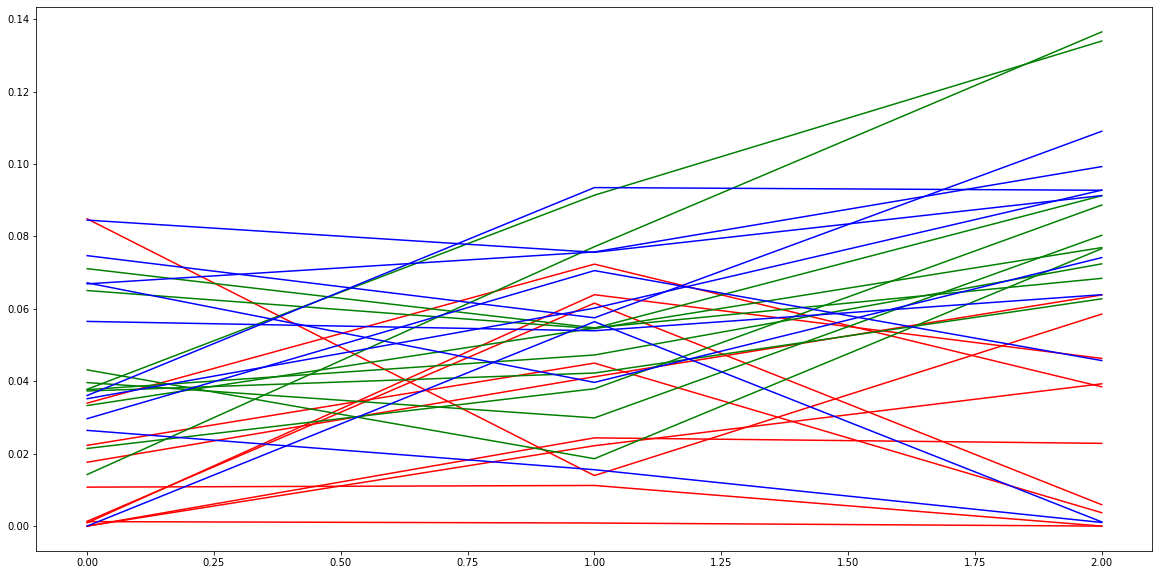

In [367]:
plt.figure(figsize=(20, 10))
unbalanced_table = np.array(batches_tables_list)[:, 0, :, 1]
balanced_D_table = np.array(batches_tables_list)[:, 1, :, 1]
balanced_A_table = np.array(batches_tables_list)[:, 2, :, 1]

plt.plot(unbalanced_table, color='r')
plt.plot(balanced_D_table, color='g')
plt.plot(balanced_A_table, color='b')

plt.show()

### Mean by batch

In [313]:
class_num = 1 # 0 - epoch, 1 - 70, 2 - 80
batch_num = 0
res = np.array(batches_tables_list)[..., 2].mean(axis=1)

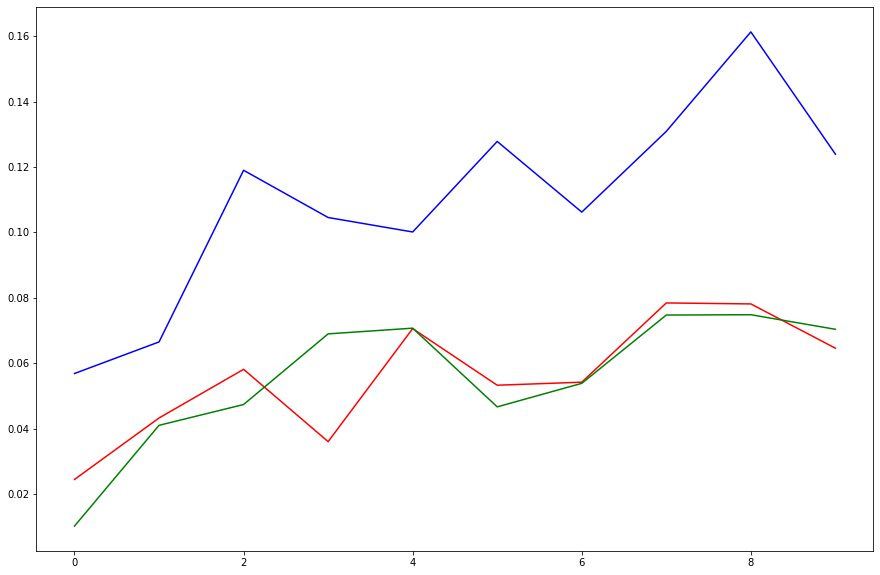

In [314]:
plt.figure(figsize=(15, 10))
plt.plot(res[0], color='r')
plt.plot(res[1], color='g')
plt.plot(res[2], color='b')
plt.show()

In [265]:
res

array([[0.        , 0.03291833, 0.02443788],
       [1.        , 0.01796366, 0.0432408 ],
       [2.        , 0.03201322, 0.0581192 ],
       [3.        , 0.02993618, 0.03601289],
       [4.        , 0.03200453, 0.07057727],
       [5.        , 0.03320933, 0.05325884],
       [6.        , 0.06379194, 0.05418865],
       [7.        , 0.02474391, 0.0784239 ],
       [8.        , 0.04630814, 0.07812474],
       [9.        , 0.03733137, 0.06458352]])

In [283]:
# experiment, batch, rows, cols
np.array(batches_tables_list)[...].shape

(3, 3, 10, 3)

In [312]:
np.array(batches_tables_list)[..., 2].mean(axis=1)

array([[0.02443788, 0.0432408 , 0.0581192 , 0.03601289, 0.07057727,
        0.05325884, 0.05418865, 0.0784239 , 0.07812474, 0.06458352],
       [0.01017835, 0.04099713, 0.04735772, 0.0689658 , 0.07070913,
        0.04664201, 0.05383456, 0.07472297, 0.07482097, 0.07036464],
       [0.05684217, 0.06650089, 0.11899573, 0.10455322, 0.10012521,
        0.12781223, 0.1062028 , 0.13090009, 0.16131322, 0.12393065]])

In [301]:
np.array(batches_tables_list)[..., 1].shape

(3, 3, 10)

In [304]:
np.array(batches_tables_list)[..., 1].mean(axis=1).shape

(3, 10)